In [8]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [53]:
%run ../cow.py
%run ../optimize_pkg.py

In [10]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
tx_SNR_range = arange(30, -10*log10(protocol_target), 0.01)
protocolbit = 4200

In [11]:
filepath_down = "../data_tables/short_block_test/default/down/n"
filepath_up = "../data_tables/short_block_test/default/up/n"
extension = ".in"

## Making Unoptimized Tables

In [42]:
downbit = 1400
rx_SNR_range = arange(0, 12, 0.01)
for N in arange(1, 6, 1):
    downTable = hs_rs_table(rx_SNR_range, N*160/downbit, int(downbit/21))
    filename = filepath_down + str(N) + extension
    save_table(downTable, filename)
# plot(downTable[0], downTable[1])

In [43]:
upbit = 1400
rx_SNR_range = arange(0, 12, 0.01)
for N in arange(1, 6, 1):
    upTable = hs_rs_table(rx_SNR_range, N*160/upbit, int(upbit/21/N))
    filename = filepath_up + str(N) + extension
    save_table(upTable, filename)

In [76]:
downbit = 1400
rx_SNR_range = arange(-12, -2, 0.01)
for N in arange(1, 6, 1):
    z = shannon_table(N*160/downbit, rx_SNR_range)
    path = "../data_tables/short_block_test/default/shannon/n" + str(N) + ".in"
    save_table(z, path)
# plot(z[0], z[1])

# Shannon + Slice of Waterfall

[  1.75   2.58   3.49   5.25  11.53]
[-10.83  -7.65  -5.71  -4.28  -3.13]

[ 12.58  10.23   9.2    9.53  14.66]


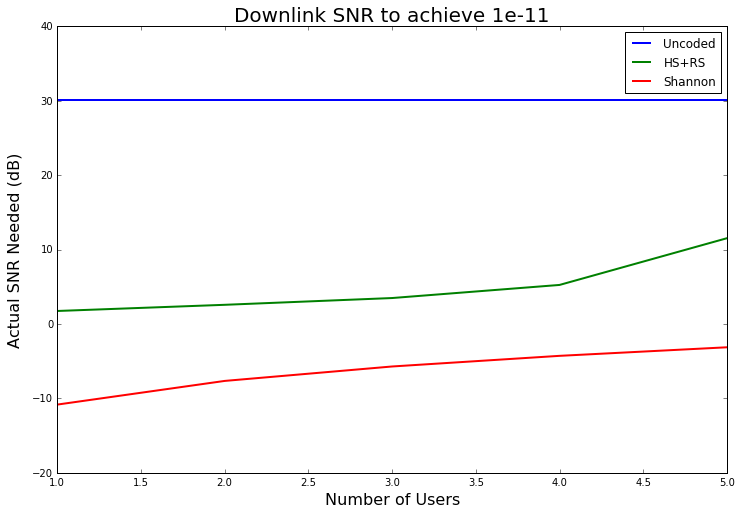

In [79]:
threshold = 10**(-11)

shannonthresh = zeros(5)
hsrsthresh = zeros(5)
uncoded = 10*log10((Qinv(threshold)**2)/2) * ones(5)

for N in range(1,6):
#     rate = N*160/10000

    shannonfile = '../data_tables/short_block_test/default/shannon/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/short_block_test/default/down/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    hsrsthresh[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,6), uncoded, lw=2.0, label='Uncoded')
plot(range(1,6), hsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,6), shannonthresh, lw=2.0, label='Shannon')

xlabel('Number of Users', fontsize=16)
ylabel('Actual SNR Needed (dB)', fontsize=16, labelpad=10)
title('Downlink SNR to achieve {0}'.format(threshold), fontsize=20)
legend(loc=0)

print hsrsthresh
print shannonthresh
print ""
print hsrsthresh-shannonthresh

In [84]:
shannon_filepath = "../data_tables/short_block_test/default/shannon/n"
shannon_data = zeros((4, 5))
for N in arange(2, 6, 1):
    shannon_data[N-2] = optimize_1(N, rx_SNR_range, tx_SNR_range, shannon_filepath, shannon_filepath, protocolbit)
    
print shannon_data
shannon_prediction = shannon_data[:, 1] + hsrsthresh[1:5] - shannonthresh[1:5]
print shannon_prediction

[[   -7.65    39.74  1400.    1400.    1400.  ]
 [   -5.71    30.    1400.    1400.    1400.  ]
 [   -4.28    30.    1400.    1400.    1400.  ]
 [   -3.13    30.    1400.    1400.    1400.  ]]
[ 49.97  39.2   39.53  44.66]


# Optimize 1

In [4]:
%%time
optimize_1_data = zeros((5, 5))
for N in arange(1, 6, 1):
    optimize_1_data[N-1] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 949 ms, sys: 5.97 ms, total: 955 ms
Wall time: 956 ms


In [24]:
print optimize_1_data

[[     inf      inf  1400.    1400.    1400.  ]
 [    3.55    50.94  1400.    1400.    1400.  ]
 [    5.31    38.65  1400.    1400.    1400.  ]
 [    8.29    34.44  1400.    1400.    1400.  ]
 [   11.18    32.92  1400.    1400.    1400.  ]]


# Optimize 2

In [20]:
%%time
optimize_2_data = zeros((5, 5))
for N in arange(1, 6, 1):
    optimize_2_data[N-1] = optimize_2(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 8min 30s, sys: 1.15 s, total: 8min 31s
Wall time: 8min 31s


In [21]:
print optimize_2_data

[[     inf      inf  1400.    1400.    1400.  ]
 [    3.4     50.79  1400.    1400.    1400.  ]
 [    5.1     38.44  1400.    1400.    1400.  ]
 [    8.      34.15  1400.    1400.    1400.  ]
 [   10.8     32.59  1400.    1400.    1400.  ]]


# Optimize 3

In [33]:
%%time
optimize_3_data = zeros((5, 5))
for N in arange(1, 6, 1):
    optimize_3_data[N-1] = optimize_3(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)
    
print optimize_3_data

[[     inf      inf  1400.    1400.    1400.  ]
 [    2.7     50.17  1400.    1400.    1400.  ]
 [    3.5     36.99  1400.    1400.    1400.  ]
 [    5.1     31.58  1400.    1400.    1400.  ]
 [   10.6     32.51  1400.    1400.    1400.  ]]
CPU times: user 6min 42s, sys: 1.91 s, total: 6min 44s
Wall time: 6min 55s


# Optimize 4

In [54]:
%%time
optimize_filepath_down = "../data_tables/short_block_test/down/n"
optimize_filepath_up = "../data_tables/short_block_test/up/n"
tx_SNR_range = arange(30, 60, 0.1)
optimize_4_data = zeros((4, 5))
for N in arange(2, 6, 1):
    optimize_4_data[N-2] = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit)
    
print optimize_4_data

[[    2.5    50.   1295.   1778.   1127. ]
 [    3.9    37.3  1239.   1764.   1197. ]
 [    6.3    32.5  1267.   1645.   1288. ]
 [   10.8    32.6  1400.   1400.   1400. ]]
CPU times: user 4min 46s, sys: 875 ms, total: 4min 47s
Wall time: 4min 48s


# Optimize 5

In [46]:
linktargetdct = {2:10**(-6), 3:10**(-4), 4:10**(-5), 5:10**(-5)}

1e-10  :  [ 38.4  33.2  32.8]
1e-09  :  [ 37.4  33.2  32.8]
1e-08  :  [ 37.4  32.4  32.8]
1e-07  :  [ 37.4  32.2  32.8]
1e-06  :  [ 37.4  32.2  32.8]
1e-05  :  [ 37.5  31.2  32.8]
0.0001  :  [ 37.2  31.3  32.9]
0.001  :  [  nan  32.9  33.4]
0.01  :  [ nan  nan  nan]
0.1  :  [ nan  nan  nan]
CPU times: user 6min 52s, sys: 1.06 s, total: 6min 53s
Wall time: 6min 54s


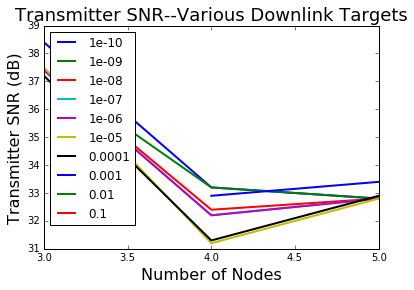

In [45]:
%%time
optimize_target = []
protocol_target = 10**(-9)
n_range = range(3, 6)
# lower precision of SNR_range leads to safe overestimate
tx_SNR_range = arange(30, -10*log10(protocol_target), 0.1)
for linktarget in [10**i for i in range(-10, 0)]:
    data = zeros((3, 5))
    for N in n_range:
        z = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktarget, linktarget)
        data[N-3] = z
    
    print linktarget, " : ", data[:, 1]
    optimize_target.append(data[:,1])
    plot(n_range, data[:, 1], lw=2.0, label=linktarget)
    
legend(loc=0)
title('Transmitter SNR--Various Downlink Targets', fontsize=18)
xlabel('Number of Nodes', fontsize=16)
ylabel('Transmitter SNR (dB)', fontsize=16)

In [58]:
%%time
optimize_filepath_down = "../data_tables/short_block_test/down/n"
optimize_filepath_up = "../data_tables/short_block_test/up/n"
tx_SNR_range = arange(30, 60, 0.01)
optimize_5_data = zeros((4, 5))
for N in arange(2, 6, 1):
    optimize_5_data[N-2] = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktargetdct[N], linktargetdct[N])
    
print optimize_5_data

[[    2.1     49.8   1253.    1694.    1253.  ]
 [    2.9     37.08  1176.    1491.    1533.  ]
 [    5.      31.17  1309.    1477.    1414.  ]
 [   10.6     32.52  1400.    1400.    1400.  ]]
CPU times: user 42min 27s, sys: 8.43 s, total: 42min 35s
Wall time: 42min 40s


# Plots

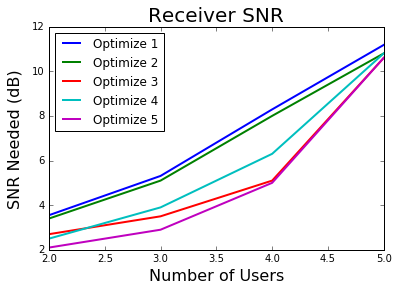

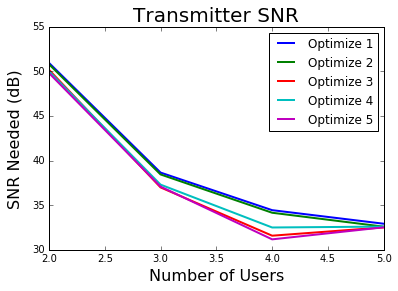

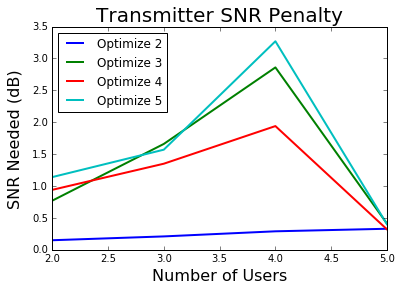

In [87]:
user_range = range(2, 6)

figure()
plot(user_range, optimize_1_data[1:5, 0], lw=2.0, label='Optimize 1')
plot(user_range, optimize_2_data[1:5, 0], lw=2.0, label='Optimize 2')
plot(user_range, optimize_3_data[1:5, 0], lw=2.0, label='Optimize 3')
plot(user_range, optimize_4_data[:, 0], lw=2.0, label='Optimize 4')
plot(user_range, optimize_5_data[:, 0], lw=2.0, label='Optimize 5')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Receiver SNR', fontsize=20)
savefig('optimization_short_receiver.pdf', bbox='tight')

figure()
# plot(user_range, shannon_prediction, lw=2.0, label='Shannon Prediction')
plot(user_range, optimize_1_data[1:5, 1], lw=2.0, label='Optimize 1')
plot(user_range, optimize_2_data[1:5, 1], lw=2.0, label='Optimize 2')
plot(user_range, optimize_3_data[1:5, 1], lw=2.0, label='Optimize 3')
plot(user_range, optimize_4_data[:, 1], lw=2.0, label='Optimize 4')
plot(user_range, optimize_5_data[:, 1], lw=2.0, label='Optimize 5')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Transmitter SNR', fontsize=20)
# savefig('optimization_short_transmitter_1.pdf', bbox='tight')

figure()
plot(user_range, optimize_1_data[1:5, 1]-optimize_2_data[1:5, 1], lw=2.0, label='Optimize 2')
plot(user_range, optimize_1_data[1:5, 1]-optimize_3_data[1:5, 1], lw=2.0, label='Optimize 3')
plot(user_range, optimize_1_data[1:5, 1]-optimize_4_data[:, 1], lw=2.0, label='Optimize 4')
plot(user_range, optimize_1_data[1:5, 1]-optimize_5_data[:, 1], lw=2.0, label='Optimize 5')
xlabel('Number of Users', fontsize=16)
ylabel('SNR Needed (dB)', fontsize=16, labelpad=10)
legend(loc=0)
title('Transmitter SNR Penalty', fontsize=20)
savefig('optimization_short_transmitter_penalty.pdf', bbox='tight')